Criando um modelo preditivo que avalia de acordo com algumas características, como 'OUTRA_RENDA_VALOR','QT_IMOVEIS' e 'SCORE_CREDITO', se um cliente de um banco pode receber emprestimo ou não.

Serão testados 5 algoritmos classificadores da biblioteca sklearn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,recall_score,accuracy_score,precision_score
import warnings
import time
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


      CODIGO_CLIENTE  UF  IDADE           ESCOLARIDADE ESTADO_CIVIL  \
2728            2731  SP     28      Superior Completo   Divorciado   
212              215  SP     48      Superior Completo   Divorciado   
2626            2629  SP     55      Superior Cursando       Casado   
2047            2050  PR     65      Superior Cursando       Casado   
1346            1349  RJ     57  Segundo Grau Completo       Casado   
1453            1456  MG     28      Superior Cursando     Solteiro   
1066            1069  RJ     51  Segundo Grau Completo       Casado   
570              573  RJ     48      Superior Completo       Casado   
298              301  SP     55      Superior Cursando       Casado   
1781            1784  PR     27      Superior Cursando       Casado   

      QT_FILHOS CASA_PROPRIA  QT_IMOVEIS  VL_IMOVEIS  OUTRA_RENDA_VALOR  \
2728          2          Não           1      370000                  0   
212           2          Sim           1      185000               3

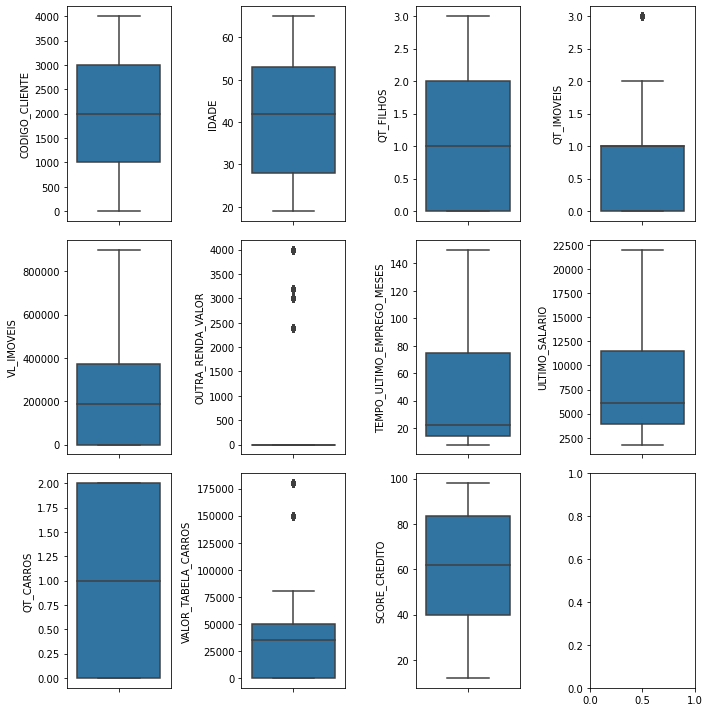

In [4]:
### Criação de um modelo preditor de emprestimos

#carregando os dados
dados = pd.read_excel('dados_credito2.xlsx')

## analise exploratoria dos dados
print(dados.sample(10),'\n')
print(dados.info(),'\n')
print(dados.describe(),'\n')

# observando quantidade de dados exclusivos por variavel
print(dados.nunique(),'\n')

# verificando a presença de dados missing
print(dados.isna().sum(),'\n')

# verificando a presença de duplicadas
print('Quantidade de duplicatas: ',dados.duplicated().sum(),'\n')


# verificando os possiveis outliers nas variaveis numericas
# grafico boxplot dos dados de treino
def Plot_outlier(t):
    var_numericas = []
    for i in t.columns:
        if t.dtypes[i] in ('int64','float64'):
            var_numericas.append(i)

    plt.rcParams['figure.figsize'] = (10,10)
    plt.rcParams['figure.autolayout'] = True
    fig,axe = plt.subplots(3,4)
    linha = 0
    coluna = 0
    for i in var_numericas:
        sns.boxplot(data=t,y=i,ax=axe[linha][coluna])
        coluna += 1
        if coluna == 4:
            linha += 1
            coluna = 0
    plt.show()

Plot_outlier(dados)

# Essas variaveis numericas não possuem outliers!! 


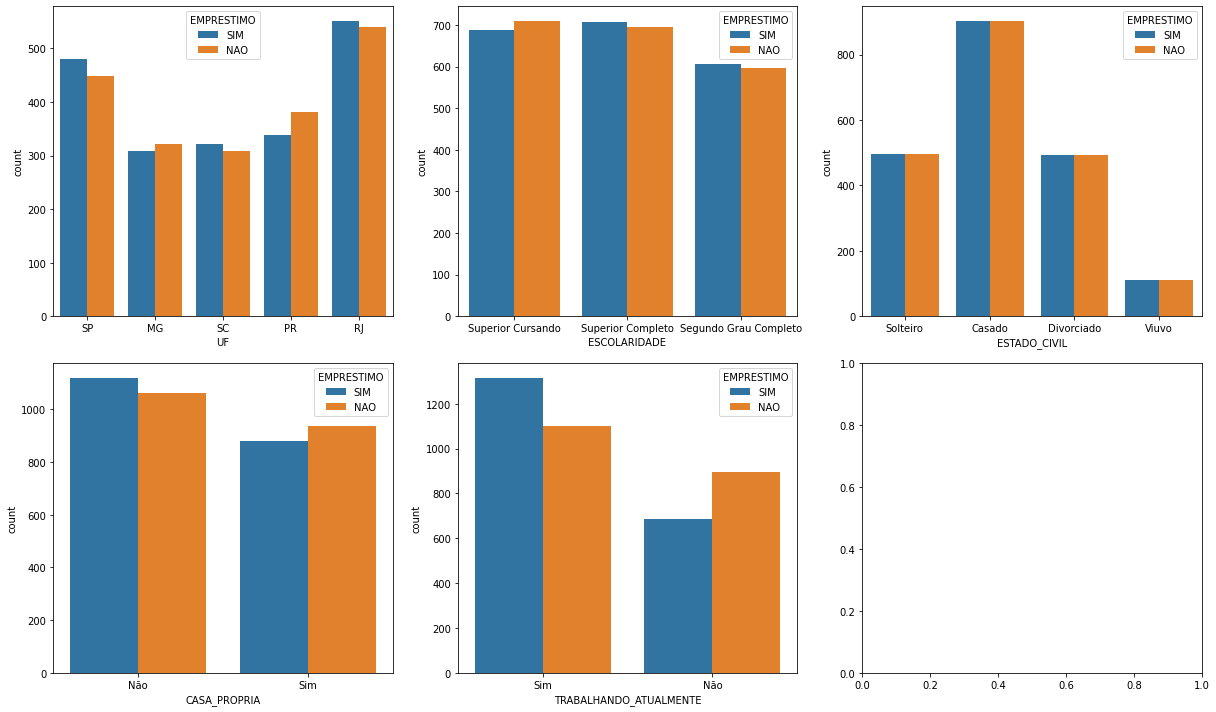

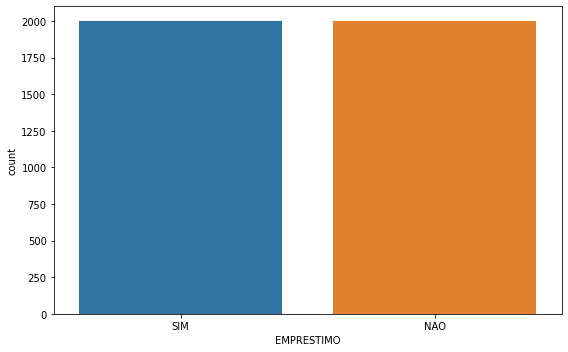

In [5]:

# analisando as variaveis categoricas 

# grafico histograma dos dados
def Plot_distri(t):
    cat = []
    for i in t.columns:
        if t.dtypes[i] in ('object','category'):
            cat.append(i)
    plt.rcParams['figure.figsize'] = (17,10)
    plt.rcParams['figure.autolayout'] = True
    fig,axe = plt.subplots(2,3)
    linha = 0
    coluna = 0
    for i in cat[:-1]:
        sns.countplot(data=t,x=i,ax=axe[linha][coluna],hue='EMPRESTIMO')
        coluna += 1
        if coluna == 3:
            linha += 1
            coluna = 0
    plt.show()

Plot_distri(dados)

print()

# analisando o balanceamento dos dados alvo
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(data=dados,x='EMPRESTIMO')
plt.show()
# os dados estão balaceados


   UF  IDADE           ESCOLARIDADE ESTADO_CIVIL  QT_FILHOS CASA_PROPRIA  \
0  SP     19      Superior Cursando     Solteiro          0          Não   
1  MG     23      Superior Completo     Solteiro          1          Não   
2  SC     25  Segundo Grau Completo       Casado          0          Sim   
3  PR     27      Superior Cursando       Casado          1          Sim   
4  SP     30  Segundo Grau Completo   Divorciado          0          Não   

   QT_IMOVEIS  VL_IMOVEIS  OUTRA_RENDA_VALOR  TEMPO_ULTIMO_EMPREGO_MESES  \
0           0           0                  0                           8   
1           0           0                  0                           9   
2           1      220000                  0                          18   
3           0           0                  0                          22   
4           0           0                  0                          14   

  TRABALHANDO_ATUALMENTE  ULTIMO_SALARIO  QT_CARROS  VALOR_TABELA_CARROS  \
0         

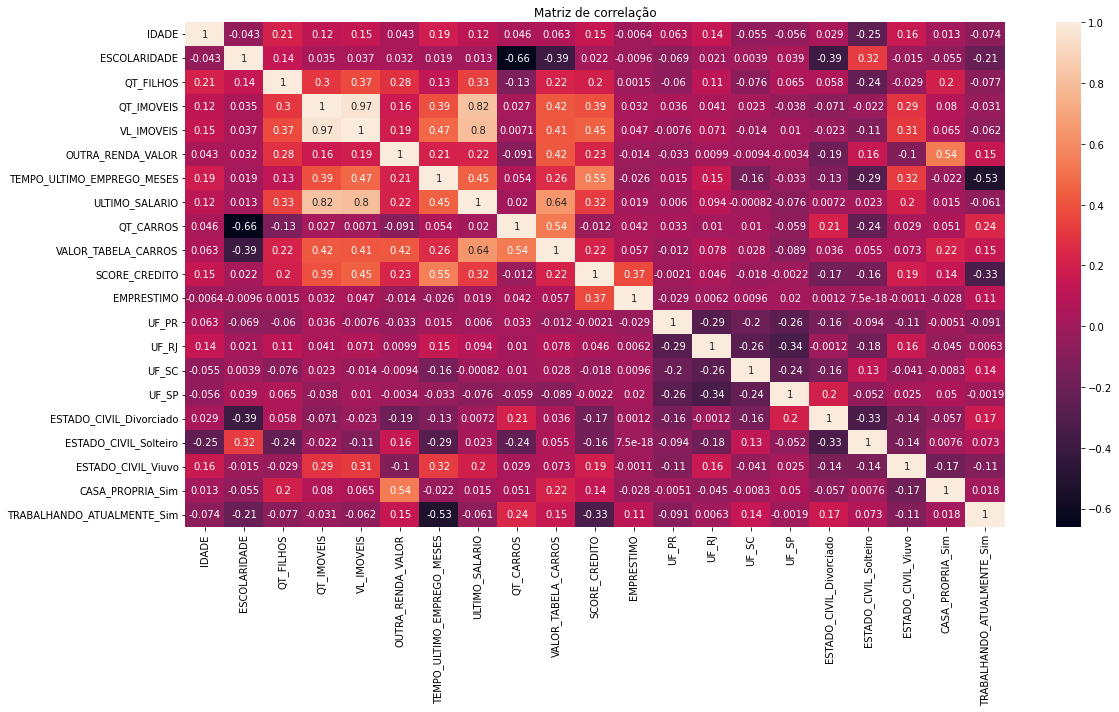

In [6]:
## Tratamento dos dados

# removendo a coluna id 
dados.drop('CODIGO_CLIENTE',axis=1,inplace=True)
print(dados.head())

# transformando os dados categoricos em numericos 
dados = pd.get_dummies(dados,columns=['UF','ESTADO_CIVIL','CASA_PROPRIA','TRABALHANDO_ATUALMENTE'],drop_first=True)

lb = LabelEncoder()
dados['ESCOLARIDADE'] = lb.fit_transform(dados['ESCOLARIDADE'])
dados['EMPRESTIMO'] = lb.fit_transform(dados['EMPRESTIMO'])

# verificando a correlação entre as variaveis
plt.rcParams['figure.figsize'] = (17,10)
plt.rcParams['figure.autolayout'] = True
sns.heatmap(dados.corr(),annot=True)
plt.title('Matriz de correlação')
plt.show()

# separando os dados de entrada e saida
entradas = dados.drop('EMPRESTIMO',axis=1)
saida = dados['EMPRESTIMO'].copy()


# separando dados em treino e teste
x_treino,x_teste,y_treino,y_teste = train_test_split(entradas,saida,test_size=0.25,random_state=42,stratify=saida)

# padronizando os dados
padro = StandardScaler()

x_treino_padro = padro.fit_transform(x_treino)
x_teste_padro = padro.fit_transform(x_teste)




Tempo de treinamento do modelo: 3.8108839988708496s
Métricas teóricas do modelo KNeighborsClassifier com os dados de treino!!!
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1500
           1       0.90      0.85      0.87      1500

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000

Métricas realisticas do modelo KNeighborsClassifier com os dados de teste!!!
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       500
           1       0.79      0.79      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



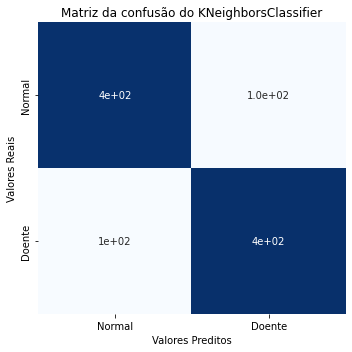

Tempo de treinamento do modelo: 67.37286305427551s
Métricas teóricas do modelo LogisticRegression com os dados de treino!!!
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1500
           1       0.72      0.64      0.68      1500

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000

Métricas realisticas do modelo LogisticRegression com os dados de teste!!!
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       500
           1       0.73      0.65      0.69       500

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



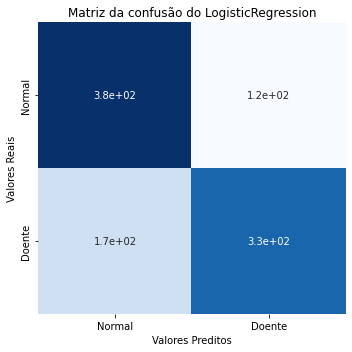

Tempo de treinamento do modelo: 8.827298641204834s
Métricas teóricas do modelo AdaBoostClassifier com os dados de treino!!!
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1500
           1       0.74      0.76      0.75      1500

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000

Métricas realisticas do modelo AdaBoostClassifier com os dados de teste!!!
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       500
           1       0.74      0.76      0.75       500

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



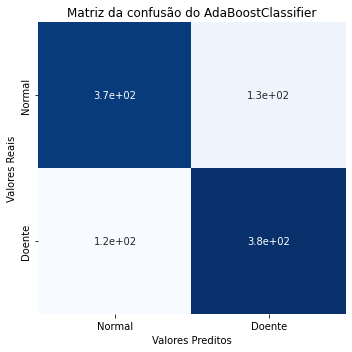

Tempo de treinamento do modelo: 300.9843418598175s
Métricas teóricas do modelo RandomForestClassifier com os dados de treino!!!
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1500
           1       0.88      0.85      0.86      1500

    accuracy                           0.87      3000
   macro avg       0.87      0.87      0.87      3000
weighted avg       0.87      0.87      0.87      3000

Métricas realisticas do modelo RandomForestClassifier com os dados de teste!!!
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       500
           1       0.80      0.83      0.82       500

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



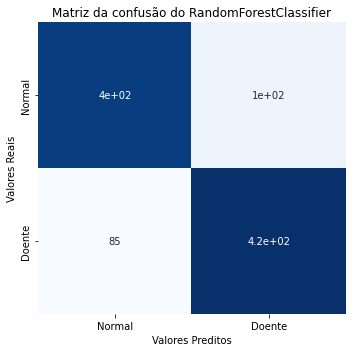

Tempo de treinamento do modelo: 2.547670602798462s
Métricas teóricas do modelo linearSVC com os dados de treino!!!
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1500
           1       0.76      0.62      0.68      1500

    accuracy                           0.71      3000
   macro avg       0.72      0.71      0.71      3000
weighted avg       0.72      0.71      0.71      3000

Métricas realisticas do modelo linearSVC com os dados de teste!!!
              precision    recall  f1-score   support

           0       0.69      0.78      0.73       500
           1       0.75      0.65      0.69       500

    accuracy                           0.71      1000
   macro avg       0.72      0.71      0.71      1000
weighted avg       0.72      0.71      0.71      1000



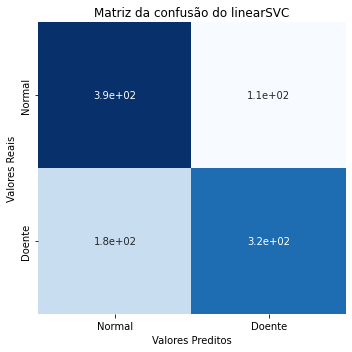

In [7]:
# determinando hiperparametros
hyper_linearSVC = {'penalty':['l1','l2'], 'loss':['hinge','squared_hinge'], 'random_state': [None,42],'max_iter':[1000,1500]}


hyper_SVC = {'kernel':['linear','poly','rbf','sigmoid'], 'gamma':['scale','auto'], 'random_state': [None,42]}

hyper_LogisticRegression = {'penalty':['l1','l2','none'], 'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[100,200,300,500],
                    'random_state': [None,42],'C':[1.0,1.5,1.8,2.0],'n_jobs':[None,-1]}


hyper_KNeighborsClassifier = {'n_neighbors':[3,5,7,9], 'weights':['uniform-cg','distance'],
                              'leaf_size':[30,40,50],'n_jobs':[-1]}


hyper_RandomForestClassifier = {'criterion':['gini', 'entropy'], 'n_estimators':[100,200,300],'bootstrap':[True,False],
                              'max_depth':[None,5,8],'random_state': [None,42],'max_features':[None,'log2','sqrt'],'n_jobs':[-1]}


hyper_AdaBoostClassifier = {'n_estimators':[50,100,150],'random_state': [None,42], 'algorithm':['SAMME','SAMME.R']}



def Determina_melhores_param_treina(algo,dicion,x_t,y_t,cvv = 3):
    grid = GridSearchCV(estimator=algo,param_grid=dicion,cv=cvv,n_jobs=-1)
    grid.fit(x_t,y_t)
    return grid

# Verificando os melhores modelos para essa aplicação

def Cria_modelo(alg,grid,x_t,y_t,x_tt,y_tt,cvv,name):
    inicio = time.time()
    modelo = Determina_melhores_param_treina(alg, grid, x_t, y_t,cvv)
    fim = time.time()
    print(f'Tempo de treinamento do modelo: {fim - inicio}s')
    predi_treino = modelo.predict(x_t)
    print(f'Métricas teóricas do modelo {name} com os dados de treino!!!')
    print(classification_report(y_t, predi_treino))

    predi_teste = cross_val_predict(estimator=modelo, X=x_tt, y=y_tt ,cv=cvv,n_jobs= -1)
    print(f'Métricas realisticas do modelo {name} com os dados de teste!!!')
    print(classification_report(y_tt, predi_teste))

    # grafico da matrix de confusão
    plt.rcParams['figure.figsize'] = (5,5)
    ax = sns.heatmap(confusion_matrix(y_tt, predi_teste), annot=True, cbar=False, cmap='Blues')
    ax.set_xticklabels(('Normal', 'Doente'))
    ax.set_yticklabels(('Normal', 'Doente'))
    plt.title(f'Matriz da confusão do {name}')
    plt.xlabel('Valores Preditos')
    plt.ylabel('Valores Reais')
    plt.show()
    return modelo, predi_teste

# KNN
knn,predi_teste2 = Cria_modelo(KNeighborsClassifier(),hyper_KNeighborsClassifier,x_treino_padro,y_treino,x_teste_padro,y_teste,3,'KNeighborsClassifier')

# LogisticRegression
lr, predi_teste4 =Cria_modelo(LogisticRegression(),hyper_LogisticRegression,x_treino_padro,y_treino,x_teste_padro,y_teste,3,'LogisticRegression')

# AdaBoostClassifier
Ac, predi_teste8 = Cria_modelo(AdaBoostClassifier(),hyper_AdaBoostClassifier,x_treino_padro,y_treino,x_teste_padro,y_teste,3,'AdaBoostClassifier')

# floresta classificadora
floresta, predi_teste = Cria_modelo(RandomForestClassifier(),hyper_RandomForestClassifier,x_treino_padro,y_treino,x_teste_padro,y_teste,3,'RandomForestClassifier')

# SVM
svm, predi_teste6 = Cria_modelo(LinearSVC(),hyper_linearSVC,x_treino_padro,y_treino,x_teste_padro,y_teste,3,'linearSVC')


In [8]:

# Identificando o melhor modelo para essa aplicação, segunda a metreica do Recall
df = {'Modelos':['AdaBoostClassifier','svm','LogisticRegression','KNeighborsClassifier','RandomForestClassifier'],
         'Acurácia Treino':[round(Ac.score(x_treino_padro,y_treino)*100,2),round(svm.score(x_treino_padro,y_treino)*100,2),round(lr.score(x_treino_padro,y_treino)*100,2),
                            round(knn.score(x_treino_padro,y_treino)*100,2),round(floresta.score(x_treino_padro,y_treino)*100,2)],
         'Acurácia Teste': [round(accuracy_score(y_teste,predi_teste8) * 100, 2),round(accuracy_score(y_teste,predi_teste6) * 100, 2), round(accuracy_score(y_teste,predi_teste4) * 100, 2),
                            round(accuracy_score(y_teste,predi_teste2) * 100, 2), round(accuracy_score(y_teste,predi_teste) * 100, 2)],
         'Recall Teste':[round(recall_score(y_teste,predi_teste8),2),round(recall_score(y_teste,predi_teste6),2),round(recall_score(y_teste,predi_teste4),2),
                         round(recall_score(y_teste,predi_teste2),2),round(recall_score(y_teste,predi_teste),2)],
        'Precision Teste':[round(precision_score(y_teste,predi_teste8),2),round(precision_score(y_teste,predi_teste6),2),round(precision_score(y_teste,predi_teste4),2),
                           round(precision_score(y_teste,predi_teste2),2),round(precision_score(y_teste,predi_teste),2)]}
precision_score

df = pd.DataFrame(df)
df.sort_values(by=['Precision Teste','Acurácia Teste'],ascending=False,inplace=True)
print(df)

                  Modelos  Acurácia Treino  Acurácia Teste  Recall Teste  \
4  RandomForestClassifier            86.63            81.3          0.83   
3    KNeighborsClassifier            87.73            79.2          0.79   
1                     svm            70.93            71.4          0.65   
0      AdaBoostClassifier            74.67            75.0          0.76   
2      LogisticRegression            69.70            70.9          0.65   

   Precision Teste  
4             0.80  
3             0.79  
1             0.75  
0             0.74  
2             0.73  


O modelo de 'floresta aleatoria' obteve o melhor desenpenho para decidir se um cliente do banco pode ou não realizar um emprestimo.